## Final Project Submission
<p>
    <li>Student name: <b>Samuel Stoltenberg</b></li>
    <li>Student pace: <b>full time</b></li>
    <li>Scheduled project review date/time: <b></b></li>
    <li>Instructor name: <b>James Irving</b></li>
    <li>Blog Post: <a href="https://skelouse.github.io/linear_regression_model_from_a_distance"> <b>Linear Regression Model From a Distance</b></a></li>
    <li>Interactive map: <a href="https://sites.google.com/skelouse.com/map/home"> <b>skelouse.com</b></a></li>
    </p>

> This project was done with the OSEMN Process
>- **O**btain
- **S**crub
- **E**xplore
- **M**odel
- I**N**terpret


## Introduction > Searching for Value Increases
> - What should you change about your home to increase its value?
- How many rooms should you add, should it be a bedroom or bathroom?
- How many square feet should you add, and in what form?
- The condition or overall grade of the home?

### CSS and matplotlib styling

In [1]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize']='xx-large'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16

# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Importing Libraries and Data
> - Import libraries
- Import data
- Get a base model


### Importing Libraries and Data

In [2]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numbers import Number
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\12147\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Using MLFrame as a wrapper for a pd.DataFrame
from mltools.mlframe import MLFrame
df = MLFrame(pd.read_csv('kc_house_data.csv'))
df_fresh = df.copy()

MLFrame is from my own library, which is included in this Repository
- Inherits from pd.DataFrame
- Has methods for use in linear regression and data cleaning

### Column Names and descriptions
> * **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [6]:
df.info()

Model is None

<class 'mltools.mlframe.MLFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64


<div class="shadow alert alert-success">
    <b>From the data:</b>
        <ul>
            <li>sqft_basement should be an int rather than an object</li>
            <li>id is irrelevant</li>
            <li>floors, view, condition, grade, and zipcode could be considered as categorical</li>
            <li> waterfront and yr_renovated have many null values we will have to fill</li>
        </ul>
    </div>

### Base Model


In [7]:
help(df.model_and_plot)

Help on method model_and_plot in module mltools.mlframe:

model_and_plot(target, figsize=(10, 10), **kwargs) method of mltools.mlframe.MLFrame instance
    Creates a new model based on target, plots a
    scatter plot of (target, model residuals), and
    plots a qqplot based on the model residuals.
    
    Parameters
    ----------------------------------------
    target::[str]
        The target for which to model on
    kwargs{dict}::
        Arguments that are sent to Model.from_formula()
        see:
    https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html
    
    Returns
    ----------------------------------------
    model
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.read_csv('mltools/tests/auto-mpg.csv'))
    >>> df.clean_col_names(inplace=True)
    >>> df.model_and_plot('mpg')



In [8]:
help(df.fill_na_mode)

Help on method fill_na_mode in module mltools.mlframe:

fill_na_mode(inplace=False, verbose=True) method of mltools.mlframe.MLFrame instance
    Fills na cells with the mode of it's
    respective column
    
    Parameters
    ----------------------------------------
    inplace[bool]::
        Defines whether to return a new dataframe or
        mutate the dataframe.
    verbose[bool]::
        Whether to print out the filling information
        or not.
    
    Returns
    ----------------------------------------
    None if inplace, otherwise returns copy of dataframe
    with nulls filled with mode
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.DataFrame(np.arange(12).reshape(3, 4),
    ...                   columns=['A', 'B', 'C', 'D']))
    >>> df['A'].loc[1:3] = np.nan
    >>> df['B'].loc[0] = np.nan
    >>> df
        A    B   C   D
    0  0.0  NaN   2   3
    1  NaN  5.0   6   7
    2  NaN  9.0  10  11
    >>> df.fill_na_mode()
  

Filling 11.0 % of waterfront with 0   0.000
Name: waterfront, dtype: float64
Filling 0.29 % of view with 0   0.000
Name: view, dtype: float64
Filling 17.79 % of yr_renovated with 0   0.000
Name: yr_renovated, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:42:08   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.906e+06   2.93e+06      2.356      0.019    1.16e+06    1.27e+07
id            -1.304e-06   4.83e-07     -2.701      0.007   -2.25e-06   -3.58e-07
bedrooms      -3.591e+04   1900.606    -18.893      0.000   -3.96e+04   -3.22e+04
bathrooms      4.156e+04   3262.635     12.737      0.000    3.52e+04     4.8e+04
sqft_living     149.4797      4.395     34.009      0.000     140.865     158.095
sqft_lot          0.1223      0.048      2.548      0.011       0.028       0.216
floors         7077.8441   3600.765      1.966      0.049      20.079    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.346e+04   2122.908     25.182      0.000    4.93e+04    5.76e+04
condition      2.664e+04   2346.646     11.351      0.000     2.2e+04    3.12e+04
grade          9.698e+04   2160.958     44.879      0.000    9.27e+04    1.01e+05
sqft_above       31.2172      4.360      7.161      0.000      22.672      39.762
yr_built      -2638.2373     71.933    -36.676      0.000   -2779.231   -2497.244
yr_renovated     23.4008      3.977      5.883      0.000      15.605      31.197
zipcode        -584.6188     32.990    -17.721      0.000    -649.282    -519.956
lat            6.005e+05   1.07e+04     55.919      0.000    5.79e+05    6.22e+05
long          -2.159e+05   1.32e+04    -16.386      0.000   -2.42e+05    -1.9e+05
sqft_living15    21.6055      3.450      6.262      0.000      14.843      28.368
sqft_lot15       -0.4040      0.074     -5.494      0.000      -0.548      -0.260
==============================================================================
Omnibus:                    18379.263   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1853325.721
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      47.816   Cond. No.                     1.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

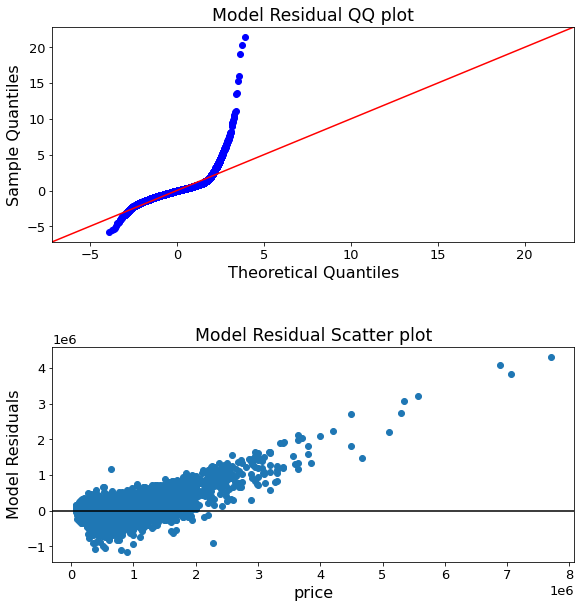

In [9]:
first_model = df.fill_na_mode(verbose=True  # Fill na for the model
        ).drop(['date', 'sqft_basement'], axis=1  # Dropping date and sqft_basement
        ).model_and_plot('price')   

<div class="shadow alert alert-success">
    <b>From the model:</b>
        <ul>
            <li>R-squared of .7 shows the model's residuals do not stray overly far from the regression line ( Goal is an R-squared of .6 or above</li>
            <li>The QQ plot is skewed right indicating we need to do some normalization and outlier removal on the data. </li>
            <li>The Residual Scatter plot shows a linear like shape.  We are aiming for homoscedasticity</li>
            <li>There are no high pvalues that stand out currently, but we still need to get out the categorical columns</li>
        </ul>
    </div>

## Scrubbing the data
> - Fill null values
- Clean columns with odd values
- Add features

### Filling null values

In [10]:
df.get_nulls()

id                  0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
sqft_above          0
grade               0
sqft_living15       0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
date                0
sqft_lot15          0
view               63
waterfront       2376
yr_renovated     3842
dtype: int64


6281

In [11]:
df.yr_renovated.value_counts(dropna=False, normalize=True).head()

0.000      0.788
nan        0.178
2014.000   0.003
2003.000   0.001
2013.000   0.001
Name: yr_renovated, dtype: float64

In [12]:
# Dropped because it is mostly 0 or na
df.drop(['yr_renovated'], axis=1, inplace=True)

""


In [13]:
help(df.fill_na_mode)

Help on method fill_na_mode in module mltools.mlframe:

fill_na_mode(inplace=False, verbose=True) method of mltools.mlframe.MLFrame instance
    Fills na cells with the mode of it's
    respective column
    
    Parameters
    ----------------------------------------
    inplace[bool]::
        Defines whether to return a new dataframe or
        mutate the dataframe.
    verbose[bool]::
        Whether to print out the filling information
        or not.
    
    Returns
    ----------------------------------------
    None if inplace, otherwise returns copy of dataframe
    with nulls filled with mode
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.DataFrame(np.arange(12).reshape(3, 4),
    ...                   columns=['A', 'B', 'C', 'D']))
    >>> df['A'].loc[1:3] = np.nan
    >>> df['B'].loc[0] = np.nan
    >>> df
        A    B   C   D
    0  0.0  NaN   2   3
    1  NaN  5.0   6   7
    2  NaN  9.0  10  11
    >>> df.fill_na_mode()
  

In [14]:
# filling rest of NAs with the columns respective mode
df.fill_na_mode(inplace=True)

Filling 11.0 % of waterfront with 0   0.000
Name: waterfront, dtype: float64
Filling 0.29 % of view with 0   0.000
Name: view, dtype: float64


### Cleaning sqft_basement

In [15]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == '?' else x)
df['sqft_basement'] = df['sqft_basement'].astype(float)

### Adding half_story and has_basement

In [16]:
df['half_story'] = df['floors'].apply(lambda x: 0 if x%1 == 0 else 1)
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# showing the percentage of df that have a half_story and a basement
print(df['half_story'].value_counts()/len(df), '\n\n', df['has_basement'].value_counts()/len(df))

0   0.904
1   0.096
Name: half_story, dtype: float64 

 0   0.615
1   0.385
Name: has_basement, dtype: float64


<div class="shadow alert alert-warning" role="alert">
    <li> 9.6% of the houses have a half_story </li>
    <li> 38.5% of the houses have a basement </li>
</div>

In [17]:
df['floors'].apply(lambda x: x%1 == 0.5).sum()  # showing 2078 half_stories

2078

### Removing half_stories

In [18]:
# i.e (1.5, 2.5, 3.5)
df['floors'] = df['floors'].astype('int64')

## Exploring the data
> - One Hot Encode Categorical columns
- Remove low r-squared factors
- Check correlation
- Check Variance Inflation Factor
- Remove outliers
- Ready to model

### One Hot Encoding

In [19]:
help(df.one_hot_encode)

Help on method one_hot_encode in module mltools.mlframe:

one_hot_encode(columns=[], drop_first=True, verbose=True, **kwargs) method of mltools.mlframe.MLFrame instance
    Makes a one hot encoded dataframe
    
    Parameters
    ----------------------------------------
    columns[list]::
        list of columns to one hot encode
        uses self.cat_cols() if not defined
    drop_first=True::
        whether to drop the first column or not
        to rid of multicollinearity
    verbose[bool]::
        Whether to print out the series or not
    kwargs{dict}::
        Arguments to send to pd.get_dummies
        see:
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
    
    Returns
    ----------------------------------------
    encoded dataframe
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.read_csv('mltools/tests/auto-mpg.csv'))
    >>> df.clean_col_names(verbose=False, inplace=True)
    >>> # spli

In [20]:
df_test = df.copy()

In [21]:
cat_cols = ['floors', 'view', 'condition', 'grade', 'zipcode']
for col in cat_cols:
    df_test[col] = df_test[col].astype('category')
df_ohe = df_test.drop(['date', 'id', 'lat', 'long'], axis=1).one_hot_encode(cat_cols).copy()
# df_ohe = df_ohe.scale(['yr_built'])  # was an issue in VIF

Added categorical columns
2 -> sqft_living
2 -> sqft_lot
2 -> floors
4 -> view
4 -> condition
10 -> grade
69 -> zipcode


### head

In [22]:
df_ohe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,half_story,has_basement,floors_2,floors_3,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.000,3,1.000,1180,5650,0.000,1180,0.000,1955,1340,5650,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.000,3,2.250,2570,7242,0.000,2170,400.000,1951,1690,7639,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.000,2,1.000,770,10000,0.000,770,0.000,1933,2720,8062,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.000,4,3.000,1960,5000,0.000,1050,910.000,1965,1360,5000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.000,3,2.000,1680,8080,0.000,1680,0.000,1987,1800,7503,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking R-squared

<div class="shadow alert alert-info">
   <h5>What Is R-squared?</h5>
    <p>R-squared (R<sup>2</sup>) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.</p>
<strong>Source: <a href="https://www.investopedia.com/terms/r/r-squared.asp">www.investopedia.com</a></strong>
</div>

In [23]:
help(df.get_r_squareds)

Help on method get_r_squareds in module mltools.mlframe:

get_r_squareds(verbose=True) method of mltools.mlframe.MLFrame instance
    Tests models price to each column in the dataframe.
    
    Parameters
    ----------------------------------------
    verbose[bool]::
        Whether to print out the series or not
    
    Returns
    ----------------------------------------
    sorted pd.Series of columns --> r_squared



#### First Check

In [24]:
# cleaned column names ( view_1.0 --> view_1_0 )
df_ohe.clean_col_names(inplace=True)
df_ohe.get_r_squareds(verbose=False)


Columns changed:
view_1.0 --> view_1_0
view_2.0 --> view_2_0
view_3.0 --> view_3_0
view_4.0 --> view_4_0


zipcode_98136   0.000
zipcode_98065   0.000
grade_8         0.000
condition_3     0.000
zipcode_98024   0.000
zipcode_98034   0.000
zipcode_98072   0.000
zipcode_98070   0.000
zipcode_98107   0.000
zipcode_98011   0.000
zipcode_98117   0.000
zipcode_98007   0.000
zipcode_98014   0.000
zipcode_98144   0.000
zipcode_98059   0.000
zipcode_98103   0.000
zipcode_98010   0.000
floors_3        0.000
zipcode_98166   0.001
zipcode_98029   0.001
zipcode_98028   0.001
zipcode_98116   0.001
zipcode_98125   0.001
zipcode_98045   0.001
zipcode_98027   0.001
zipcode_98019   0.001
zipcode_98122   0.001
condition_4     0.001
grade_4         0.001
zipcode_98008   0.001
zipcode_98148   0.001
zipcode_98115   0.001
zipcode_98077   0.001
zipcode_98177   0.002
zipcode_98126   0.002
zipcode_98056   0.002
zipcode_98155   0.002
zipcode_98108   0.002
zipcode_98052   0.002
zipcode_98053   0.003
condition_2     0.003
zipcode_98118   0.003
half_story      0.003
yr_built        0.003
zipcode_98188   0.003
zipcode_98

<div class="shadow alert alert-warning">
zipcode is most of the lower half, so we'll remove it
    </div>

#### Dropping zipcode

In [25]:
# all of the columns with zipcode in it
drop_cols = [x for x in df_ohe.columns if 'zipcode' in x]

#### Second Check

In [26]:
df_ohe.drop(drop_cols, axis=1, inplace=True)
df_ohe.get_r_squareds(verbose=False)

grade_8         0.000
condition_3     0.000
floors_3        0.000
condition_4     0.001
grade_4         0.001
condition_2     0.003
half_story      0.003
yr_built        0.003
condition_5     0.003
sqft_lot15      0.007
grade_5         0.007
sqft_lot        0.008
view_1_0        0.009
view_2_0        0.022
has_basement    0.032
view_3_0        0.033
grade_6         0.044
grade_13        0.045
grade_9         0.056
floors_2        0.064
waterfront      0.070
grade_12        0.085
view_4_0        0.092
bedrooms        0.095
grade_7         0.100
sqft_basement   0.103
grade_10        0.116
grade_11        0.128
bathrooms       0.277
sqft_living15   0.343
sqft_above      0.366
sqft_living     0.493
price           1.000
dtype: float64

<div class="shadow alert alert-success">
    <strong>Seems evenly distributed.</strong>
</div>


### Correlation plot

In [27]:
help(df.plot_corr)

Help on method plot_corr in module mltools.mlframe:

plot_corr(figsize=(25, 25), annot=False, **kwargs) method of mltools.mlframe.MLFrame instance
    Plots a predefined correlation heatmap
    
    Parameters
    ----------------------------------------
    figsize(tu, ple)::
        The size of the plotted figure
    annot[bool]::
        Whether or not to annotate the cells
    kwargs{dict}::
        Arguments that are sent to sns.heatmap
        see:
    https://seaborn.pydata.org/generated/seaborn.heatmap.html
    
    Returns
    ----------------------------------------
    fig, ax
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.read_csv('mltools/tests/auto-mpg.csv'))
    >>> df.clean_col_names(inplace=True, verbose=False)
    >>> df.drop('car_name', axis=1, inplace=True)
    >>> df.plot_corr(annot=True)



(<Figure size 1800x1800 with 2 Axes>, <AxesSubplot:>)

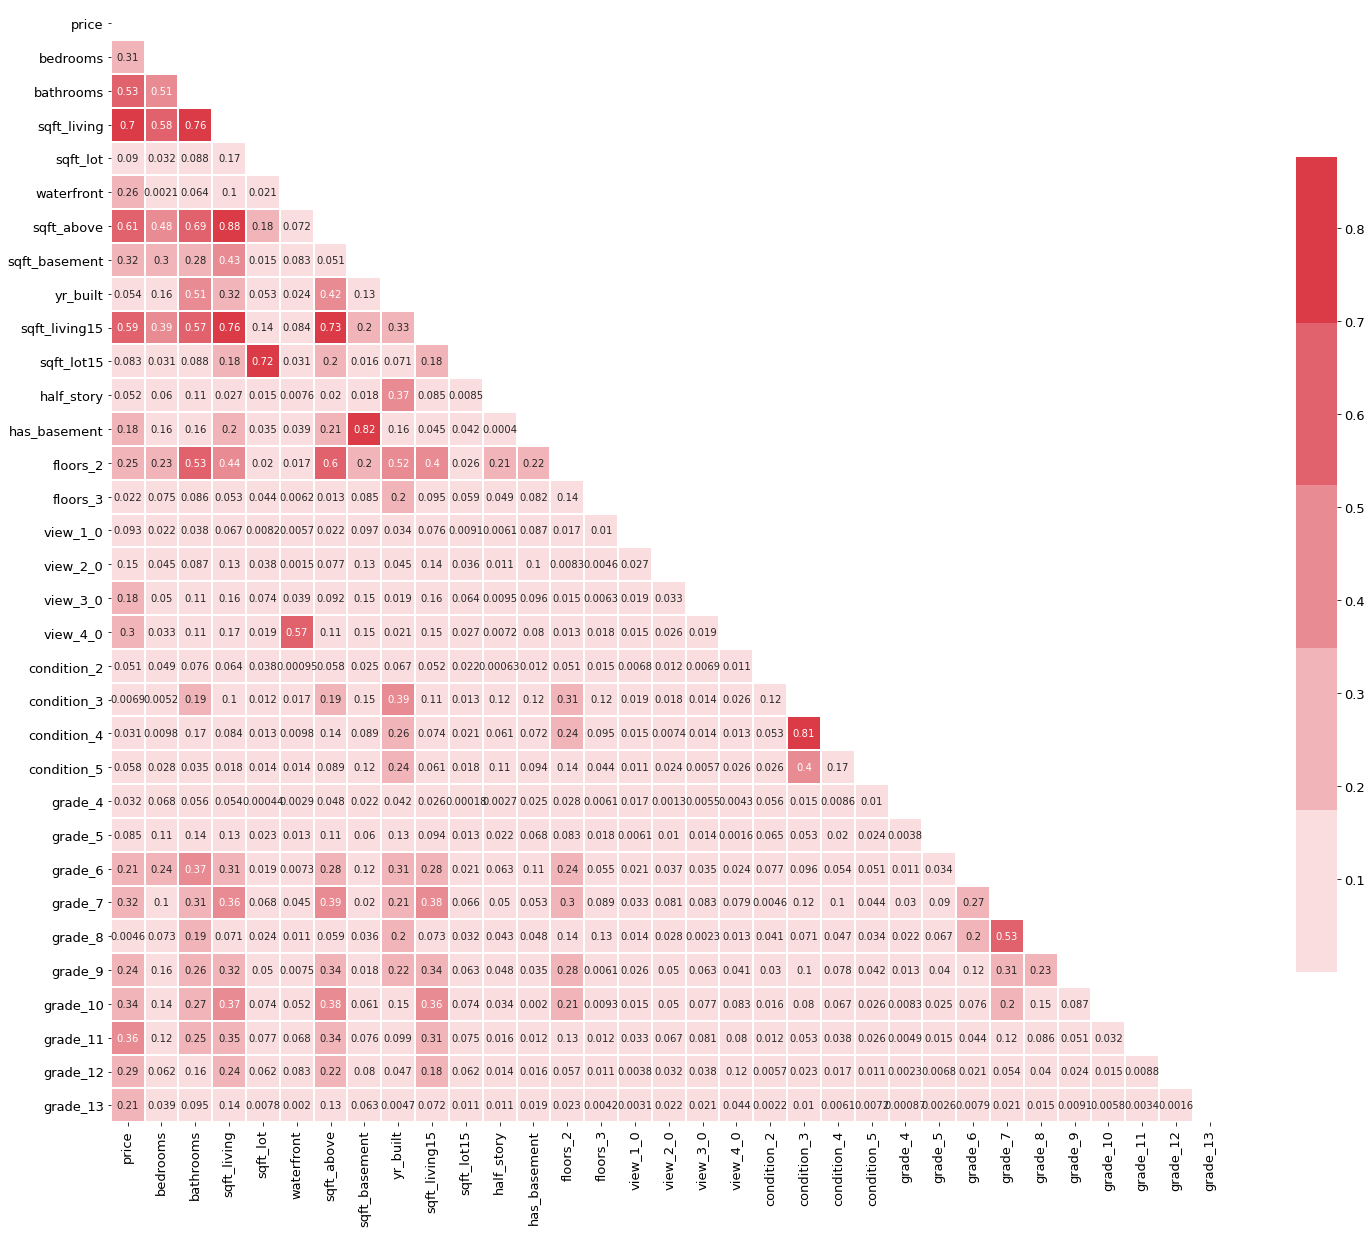

In [28]:
df_ohe.plot_corr(annot=True)

<div class="shadow alert alert-success">
    <b>High correlations:</b>
        <ul>
            <li>sqft_above with bedrooms, bathrooms, and sqft_living</li>
            <li>sqft_living with bedroom and bathrooms</li>
            <li>sqft_living15 with bedrooms, bathrooms, and sqft_living</li>
            <li>floors_2 with bedrooms, bathrooms, and sqft_living</li>
            <li>grade also seems to have some low correlations with the above</li>
            <br>
            <li>Which ones should we remove?</li>
            <ul><li>Performing VIF below to find out.</li>
        </ul>
</div>

### Checking Variance Inflation Factor

<div class="shadow alert alert-info">
   <h5>What Is Variance Inflation Factor?</h5>
<p>Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. </p>
<strong>Source: <a href="https://www.investopedia.com/terms/v/variance-inflation-factor.asp">www.investopedia.com</a></strong>
</div>

In [29]:
help(df.get_vif_cols)

Help on method get_vif_cols in module mltools.mlframe:

get_vif_cols(target, threshold=6, verbose=True, inplace=False) method of mltools.mlframe.MLFrame instance
    Computes Variance Inflation Factor
    for the dataframe, and gets the columns
    that are above the defined threshold
    
    Parameters
    ----------------------------------------
    target[str]::
        The column name to base the VIF on
    threshold=6[int]::
        The threshold that columns would be above
        where they are an issue, and need to be
        looked at
    verbose[bool]::
        Whether to print out the series or not
    inplace[bool]::
        Whether to return the series or not
    
    Returns
    ----------------------------------------
    Depending on inplace
    Series of variance_inflation_factor for each column
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.read_csv('mltools/tests/auto-mpg.csv'))
    >>> df.drop(['car name'], axis=1, inpla

#### First Check

In [30]:
df_ohe.get_vif_cols('price', inplace=True)


VIF columns > 6: 
condition_2        6.858
grade_13          14.108
grade_4           27.989
sqft_basement     36.246
condition_5       55.792
grade_12          90.080
sqft_above       119.805
condition_4      147.288
sqft_living      147.388
condition_3      173.047
grade_5          240.457
grade_11         393.991
grade_10        1078.042
grade_6         1848.082
grade_9         2303.619
grade_8         4368.755
grade_7         5251.506
dtype: float64


<div class="shadow alert alert-warning">
    grade has the highest overall VIF,<strong> Dropping</strong>
</div>

In [31]:
drop_cols = [x for x in df_ohe.columns if 'grade' in x]
drop_cols

['grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

#### Second Check

In [32]:
df_ohe.drop(drop_cols, axis=1).get_vif_cols('price', inplace=True)


VIF columns > 6: 
condition_2       6.824
sqft_basement    36.151
condition_5      55.192
sqft_above      119.391
condition_4     145.662
sqft_living     146.767
condition_3     171.175
dtype: float64


<div class="shadow alert alert-warning">
    condition has the highest overall VIF,<strong> Dropping</strong>
</div>

In [33]:
drop_cols = drop_cols + [x for x in df_ohe.columns if 'condition' in x]

#### Third Check

In [34]:
df_ohe.drop(drop_cols, axis=1).get_vif_cols('price', inplace=True)


VIF columns > 6: 
sqft_basement    36.147
sqft_above      119.305
sqft_living     146.693
dtype: float64


<div class="shadow alert alert-warning">
    sqft_living has the highest VIF,<strong> Dropping</strong>
</div>


In [35]:
drop_cols.append('sqft_living')

In [36]:
df_test = df_ohe.drop(drop_cols, axis=1)
df_test.get_vif_cols('price')


VIF columns > 6: 
Series([], dtype: float64)


Series([], dtype: float64)

### Removing outliers

<div class="shadow alert alert-info">
   <h5>What are Z_score outliers?</h5>
    <p>
    Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.
    </p>
    <strong>Source: <a href="https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/">www.geeksforgeeks.org</a></strong>
    <h5>What are IQR_score outliers?</h5>
    <p>
    Interquartile Range (IQR) is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.
    </p>
    <strong>Source: <a href="https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/">www.geeksforgeeks.org</a></strong>
</div>

In [37]:
df_test.describe()

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,half_story,has_basement,floors_2,floors_3,view_1_0,view_2_0,view_3_0,view_4_0
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,15099.409,0.007,1788.597,285.717,1971.000,1986.620,12758.284,0.096,0.385,0.389,0.029,0.015,0.044,0.024,0.015
std,367368.140,0.926,0.769,41412.637,0.082,827.760,439.820,29.375,685.230,27274.442,0.295,0.487,0.487,0.167,0.123,0.206,0.152,0.120
min,78000.000,1.000,0.500,520.000,0.000,370.000,0.000,1900.000,399.000,651.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,322000.000,3.000,1.750,5040.000,0.000,1190.000,0.000,1951.000,1490.000,5100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,450000.000,3.000,2.250,7618.000,0.000,1560.000,0.000,1975.000,1840.000,7620.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,645000.000,4.000,2.500,10685.000,0.000,2210.000,550.000,1997.000,2360.000,10083.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
max,7700000.000,33.000,8.000,1651359.000,1.000,9410.000,4820.000,2015.000,6210.000,871200.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


<div class="shadow alert alert-success">
  <strong>Outlier Removal:</strong>
    <li>price has a high max of $7,700,000.</li>
    <li>Thirty-Three <b>Bedrooms!</b> </li>
    <li>sqft_lot has a high max of 1,651,359 ft<sup>2</sup>.</li>
</div>

In [38]:
outlier_cols = ['price', 'bedrooms', 'sqft_lot']

In [39]:
help(df.outlier_removal)

Help on method outlier_removal in module mltools.mlframe:

outlier_removal(columns=[], IQR=False, z_score=False, verbose=True) method of mltools.mlframe.MLFrame instance
    Removes outliers based on IQR or z_score
    
    Parameters
    ----------------------------------------
    column[list, str]::
        The columns of which to remove outliers
        if blank, removes from all columns
    IQR[bool]::
        Whether or not to remove outliers
        using IQR method
    z_score[bool]::
        Whether or not to remove outliers
        using z_score method
    verbose[bool]::
        Whether to print how many outliers were
        found in each column or now       
    
    Returns
    ----------------------------------------
    Copy of dataframe with outliers removed
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.read_csv('mltools/tests/auto-mpg.csv'))
    >>> df = df.outlier_removal('horsepower',
    ...                          IQR

In [40]:
df_ohe_z = df_test.outlier_removal(columns=outlier_cols, z_score=True)

Found 406 outliers using z_score in price or ~ 1.88%
Removed
Found 62 outliers using z_score in bedrooms or ~ 0.29%
Removed
Found 346 outliers using z_score in sqft_lot or ~ 1.6%
Removed


In [41]:
df_ohe_IQR = df_test.outlier_removal(columns=outlier_cols, IQR=True)

Found 1158 outliers using IQR in price or ~ 5.36%
Removed
Found 530 outliers using IQR in bedrooms or ~ 2.45%
Removed
Found 2419 outliers using IQR in sqft_lot or ~ 11.2%
Removed


## Models
> **Model**
- df_ohe_z
- df_ohe_IQR

### df_ohe_z Model and Plot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:42:14   Log-Likelihood:            -2.8020e+05
No. Observations:               20807   AIC:                         5.604e+05
Df Residuals:                   20789   BIC:                         5.606e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.275e+06   1.12e+05     46.992      0.000    5.06e+06     5.5e+06
bedrooms      -3.194e+04   1773.614    -18.009      0.000   -3.54e+04   -2.85e+04
bathrooms      5.038e+04   2864.710     17.587      0.000    4.48e+04     5.6e+04
sqft_lot         -0.6751      0.132     -5.097      0.000      -0.935      -0.415
waterfront     1.323e+05   2.24e+04      5.906      0.000    8.84e+04    1.76e+05
sqft_above      159.8863      3.355     47.655      0.000     153.310     166.463
sqft_basement    93.4470      5.772     16.190      0.000      82.134     104.760
yr_built      -2702.5486     57.960    -46.628      0.000   -2816.155   -2588.942
sqft_living15   107.5312      2.982     36.056      0.000     101.686     113.377
sqft_lot15       -0.4036      0.110     -3.679      0.000      -0.619      -0.189
half_story     3.027e+04   4535.889      6.673      0.000    2.14e+04    3.92e+04
has_basement   6.207e+04   4643.533     13.366      0.000     5.3e+04    7.12e+04
floors_2       3.748e+04   3797.945      9.868      0.000       3e+04    4.49e+04
floors_3       2.072e+05   7951.015     26.060      0.000    1.92e+05    2.23e+05
view_1_0       8.198e+04      1e+04      8.187      0.000    6.24e+04    1.02e+05
view_2_0       6.668e+04   6070.448     10.985      0.000    5.48e+04    7.86e+04
view_3_0       1.194e+05   8623.413     13.848      0.000    1.03e+05    1.36e+05
view_4_0       2.013e+05   1.38e+04     14.616      0.000    1.74e+05    2.28e+05
==============================================================================
Omnibus:                     3291.162   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8658.945
Skew:                           0.873   Prob(JB):                         0.00
Kurtosis:                       5.635   Cond. No.                     2.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

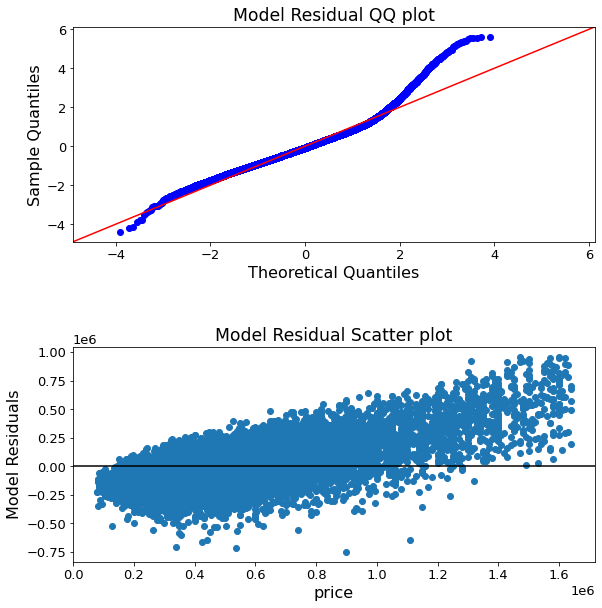

In [42]:
df_ohe_z.model_and_plot('price')

### df_ohe_IQR Model and Plot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1097.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:42:15   Log-Likelihood:            -2.3791e+05
No. Observations:               17905   AIC:                         4.759e+05
Df Residuals:                   17887   BIC:                         4.760e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.729e+06   1.04e+05     45.611      0.000    4.53e+06    4.93e+06
bedrooms      -2.501e+04   1764.626    -14.175      0.000   -2.85e+04   -2.16e+04
bathrooms      3.748e+04   2673.291     14.020      0.000    3.22e+04    4.27e+04
sqft_lot         -6.5729      0.468    -14.058      0.000      -7.489      -5.656
waterfront     1.137e+05   3.23e+04      3.524      0.000    5.04e+04    1.77e+05
sqft_above      140.8655      3.404     41.387      0.000     134.194     147.537
sqft_basement    72.0979      5.735     12.571      0.000      60.856      83.339
yr_built      -2376.2900     53.665    -44.280      0.000   -2481.479   -2271.101
sqft_living15   104.3960      2.972     35.124      0.000      98.570     110.222
sqft_lot15       -1.5333      0.344     -4.462      0.000      -2.207      -0.860
half_story     2.041e+04   4264.352      4.786      0.000     1.2e+04    2.88e+04
has_basement   5.868e+04   4319.254     13.587      0.000    5.02e+04    6.72e+04
floors_2       1.659e+04   3786.435      4.380      0.000    9163.229     2.4e+04
floors_3       1.468e+05   7365.765     19.931      0.000    1.32e+05    1.61e+05
view_1_0        6.44e+04   9339.684      6.895      0.000    4.61e+04    8.27e+04
view_2_0       5.751e+04   5778.821      9.952      0.000    4.62e+04    6.88e+04
view_3_0       7.154e+04   9148.876      7.820      0.000    5.36e+04    8.95e+04
view_4_0       1.615e+05   1.62e+04      9.980      0.000     1.3e+05    1.93e+05
==============================================================================
Omnibus:                      751.477   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              927.238
Skew:                           0.461   Prob(JB):                    4.50e-202
Kurtosis:                       3.626   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

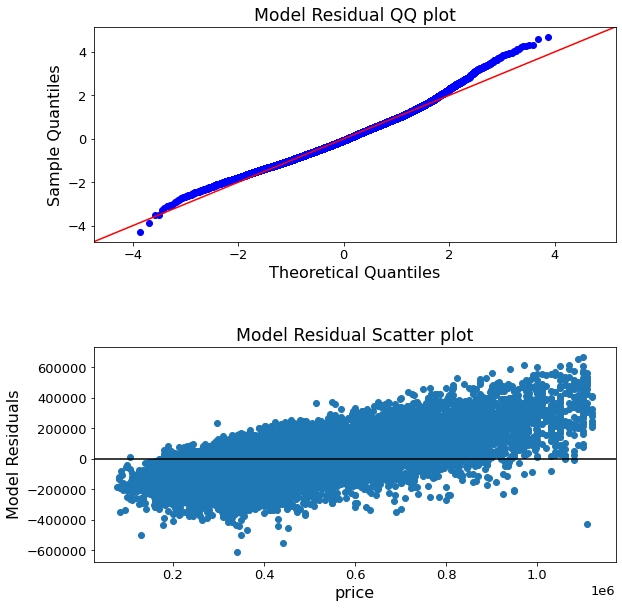

In [43]:
df_ohe_IQR.model_and_plot('price')

<div class="shadow alert alert-danger">
  <strong>From the models:</strong>
    <li>Both have a low R<sup>2</sup> < 0.6, indicating strong residual loss of the model.</li>
    <li>Both are heteroscedastic indicating we cannot meet our normality assumption.</li>
    <li>On the bright side, the qq plots line up nicely!</li><li>Z_score removal had a higher R<sup>2</sup> while IQR had more normally distributed residuals</li>
</div>

## Exploring the data ( Part 2 )
> - Try different categorical columns 
- Check Variance Inflation Factor
- Drop High VIF columns
- Remove price outliers

### Making df2

In [44]:
check_vif = False # True to rerun VIF functions ( Takes a while )
cat_cols = ['zipcode', 'view', 'floors']
drop_cols = ['date', 'id', 'lat', 'long']
df2 = df.copy()

### One Hot Encode

In [45]:
for col in cat_cols:
    df2[col] = df2[col].astype('category')
df2_ohe = df2.drop(drop_cols, axis=1).one_hot_encode(cat_cols)
# Scaled after VIF inference
df2_ohe = df2_ohe.scale(['yr_built'])
df2_ohe.clean_col_names(inplace=True)
df2_ohe.head()

Added categorical columns
2 -> sqft_living
2 -> sqft_lot
2 -> floors
4 -> view
69 -> zipcode

Scaling:
   yr_built

Columns changed:
view_1.0 --> view_1_0
view_2.0 --> view_2_0
view_3.0 --> view_3_0
view_4.0 --> view_4_0


,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,half_story,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_1_0,view_2_0,view_3_0,view_4_0,floors_2,floors_3
0,221900.000,3,1.000,1180,5650,0.000,3,7,1180,0.000,-0.545,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,538000.000,3,2.250,2570,7242,0.000,3,7,2170,400.000,-0.681,1690,7639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,180000.000,2,1.000,770,10000,0.000,3,6,770,0.000,-1.294,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.000,4,3.000,1960,5000,0.000,5,7,1050,910.000,-0.204,1360,5000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,510000.000,3,2.000,1680,8080,0.000,3,8,1680,0.000,0.545,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Check VIF

In [46]:
if check_vif:
    vif = df2_ohe.get_vif_cols('price')

In [47]:
drop_cols = ['sqft_basement']
if check_vif:
    vif = df2_ohe.drop(drop_cols, axis=1).get_vif_cols('price')

In [48]:
drop_cols.append('sqft_above')
if check_vif:
    vif = df2_ohe.drop(drop_cols, axis=1).get_vif_cols('price')

<div class="shadow alert alert-success">
  <strong>Checking VIF:</strong>
        For the first model we removed sqft_living.  We thought that would predict better, thus removing sqft_basement and sqft_above.
</div>

### Drop Columns

In [49]:
df2_ohe.drop(drop_cols, axis=1, inplace=True)

""


### Remove Outliers

In [50]:
df2_ohe = df2_ohe.outlier_removal('price', IQR=True)

Found 1158 outliers using IQR in price or ~ 5.36%
Removed


In [51]:
df2_ohe['price'].min(), df2_ohe['price'].max()

(78000.0, 1120000.0)

## Models ( Part 2)
> -  Model
- Remove high p-values
- Repeat


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1149.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:42:15   Log-Likelihood:            -2.6110e+05
No. Observations:               20439   AIC:                         5.224e+05
Df Residuals:                   20351   BIC:                         5.231e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.897e+05   8538.523    -45.638      0.000   -4.06e+05   -3.73e+05
bedrooms      -4882.9226    866.495     -5.635      0.000   -6581.322   -3184.523
bathrooms      1.387e+04   1482.294      9.357      0.000     1.1e+04    1.68e+04
sqft_living      96.9124      1.702     56.935      0.000      93.576     100.249
sqft_lot          0.2931      0.021     13.645      0.000       0.251       0.335
waterfront     1.474e+05   1.39e+04     10.601      0.000     1.2e+05    1.75e+05
condition      2.129e+04   1043.984     20.397      0.000    1.92e+04    2.33e+04
grade          4.639e+04   1016.935     45.620      0.000    4.44e+04    4.84e+04
yr_built      -1.493e+04   1079.994    -13.824      0.000    -1.7e+04   -1.28e+04
sqft_living15    37.2281      1.711     21.754      0.000      33.874      40.582
sqft_lot15       -0.0012      0.034     -0.036      0.971      -0.067       0.065
half_story     9119.8284   2311.464      3.945      0.000    4589.173    1.37e+04
has_basement      -2e+04   1561.481    -12.809      0.000   -2.31e+04   -1.69e+04
zipcode_98002  1.006e+04   7588.229      1.325      0.185   -4817.383    2.49e+04
zipcode_98003 -6096.5055   6833.883     -0.892      0.372   -1.95e+04    7298.456
zipcode_98004  5.058e+05   8322.603     60.773      0.000    4.89e+05    5.22e+05
zipcode_98005  3.231e+05   8374.373     38.587      0.000    3.07e+05     3.4e+05
zipcode_98006  2.655e+05   6304.262     42.121      0.000    2.53e+05    2.78e+05
zipcode_98007  2.526e+05   8634.925     29.252      0.000    2.36e+05     2.7e+05
zipcode_98008  2.393e+05   6967.652     34.339      0.000    2.26e+05    2.53e+05
zipcode_98010   8.87e+04   9731.806      9.114      0.000    6.96e+04    1.08e+05
zipcode_98011  1.428e+05   7635.746     18.695      0.000    1.28e+05    1.58e+05
zipcode_98014  1.072e+05   9142.944     11.723      0.000    8.93e+04    1.25e+05
zipcode_98019  9.865e+04   7726.046     12.768      0.000    8.35e+04    1.14e+05
zipcode_98022  1047.8643   7319.943      0.143      0.886   -1.33e+04    1.54e+04
zipcode_98023 -2.211e+04   5937.399     -3.723      0.000   -3.37e+04   -1.05e+04
zipcode_98024  1.521e+05   1.11e+04     13.700      0.000     1.3e+05    1.74e+05
zipcode_98027  1.857e+05   6300.940     29.476      0.000    1.73e+05    1.98e+05
zipcode_98028   1.31e+05   6828.698     19.191      0.000    1.18e+05    1.44e+05
zipcode_98029  2.237e+05   6683.086     33.476      0.000    2.11e+05    2.37e+05
zipcode_98030  5260.4870   7001.930      0.751      0.452   -8463.859     1.9e+04
zipcode_98031  9987.7714   6877.124      1.452      0.146   -3491.945    2.35e+04
zipcode_98032 -6748.1917   8907.709     -0.758      0.449   -2.42e+04    1.07e+04
zipcode_98033  3.202e+05   6375.348     50.221      0.000    3.08e+05    3.33e+05
zipcode_98034  1.855e+05   5869.648     31.604   

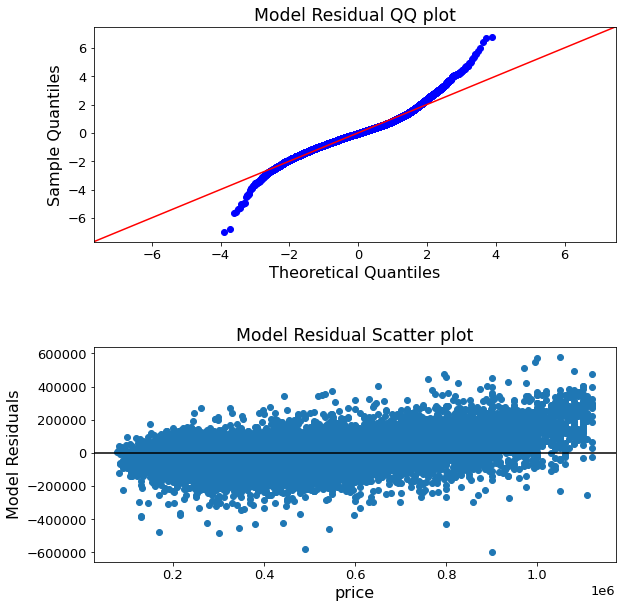

In [52]:
df2_ohe.model_and_plot('price')

<div class="shadow alert alert-warning">
    <b>From the model:</b>
        <ul>
            <li>The R<span>2</span> is excellent at 0.831</li>
            <li>The QQ plot has a small tail and head</li>
            <li>The Scatter plot has homoscedasticity</li>
            <li>Unfortunately we still have some p-values > .05</li>
        </ul>
    </div>

In [53]:
high_p = df2_ohe.model.pvalues[df2_ohe.model.pvalues > .05]
df2_ohe = df2_ohe.outlier_removal(columns=[*high_p.index], IQR=True)

Found 1937 outliers using IQR in sqft_lot15 or ~ 9.48%
Removed
Found 199 outliers using IQR in zipcode_98002 or ~ 0.97%
Removed
Found 280 outliers using IQR in zipcode_98003 or ~ 1.37%
Removed
Found 233 outliers using IQR in zipcode_98022 or ~ 1.14%
Removed
Found 256 outliers using IQR in zipcode_98030 or ~ 1.25%
Removed
Found 273 outliers using IQR in zipcode_98031 or ~ 1.34%
Removed
Found 125 outliers using IQR in zipcode_98032 or ~ 0.61%
Removed
Found 547 outliers using IQR in zipcode_98042 or ~ 2.68%
Removed
Found 0 outliers using IQR in floors_2 or ~ 0.0%
Removed


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     992.0
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:42:16   Log-Likelihood:            -2.1440e+05
No. Observations:               16788   AIC:                         4.290e+05
Df Residuals:                   16707   BIC:                         4.296e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.24e+05   9626.375    -44.043      0.000   -4.43e+05   -4.05e+05
bedrooms      -4579.3364    944.913     -4.846      0.000   -6431.465   -2727.208
bathrooms      1.274e+04   1619.199      7.871      0.000    9570.766    1.59e+04
sqft_living     103.4373      1.945     53.191      0.000      99.626     107.249
sqft_lot          0.2593      0.049      5.258      0.000       0.163       0.356
waterfront     2.096e+05   1.85e+04     11.317      0.000    1.73e+05    2.46e+05
condition      2.109e+04   1141.982     18.465      0.000    1.88e+04    2.33e+04
grade          4.778e+04   1154.654     41.384      0.000    4.55e+04       5e+04
yr_built      -1.742e+04   1186.924    -14.674      0.000   -1.97e+04   -1.51e+04
sqft_living15    36.6918      1.949     18.821      0.000      32.871      40.513
sqft_lot15        1.0012      0.329      3.040      0.002       0.356       1.647
half_story     8561.0754   2540.958      3.369      0.001    3580.529    1.35e+04
has_basement  -1.858e+04   1704.145    -10.902      0.000   -2.19e+04   -1.52e+04
zipcode_98002   1.22e-08   5.51e-09      2.212      0.027    1.39e-09     2.3e-08
zipcode_98003  3.857e-09   1.56e-09      2.473      0.013       8e-10    6.91e-09
zipcode_98004    5.1e+05   8709.596     58.559      0.000    4.93e+05    5.27e+05
zipcode_98005  3.246e+05   9328.834     34.800      0.000    3.06e+05    3.43e+05
zipcode_98006  2.651e+05   6646.829     39.877      0.000    2.52e+05    2.78e+05
zipcode_98007  2.511e+05   8862.217     28.333      0.000    2.34e+05    2.68e+05
zipcode_98008  2.416e+05   7260.576     33.269      0.000    2.27e+05    2.56e+05
zipcode_98010  8.873e+04   1.35e+04      6.564      0.000    6.22e+04    1.15e+05
zipcode_98011  1.448e+05   7915.545     18.292      0.000    1.29e+05     1.6e+05
zipcode_98014  1.051e+05    1.4e+04      7.503      0.000    7.77e+04    1.33e+05
zipcode_98019   9.61e+04   8627.833     11.139      0.000    7.92e+04    1.13e+05
zipcode_98022  4.553e-10   3.87e-10      1.177      0.239   -3.03e-10    1.21e-09
zipcode_98023 -1.584e+04   6277.385     -2.523      0.012   -2.81e+04   -3535.407
zipcode_98024  1.597e+05   1.69e+04      9.459      0.000    1.27e+05    1.93e+05
zipcode_98027  2.256e+05   7281.788     30.977      0.000    2.11e+05     2.4e+05
zipcode_98028  1.311e+05   7121.059     18.405      0.000    1.17e+05    1.45e+05
zipcode_98029  2.271e+05   7074.220     32.102      0.000    2.13e+05    2.41e+05
zipcode_98030 -8.598e-10   2.54e-10     -3.389      0.001   -1.36e-09   -3.62e-10
zipcode_98031 -3.038e-10   4.19e-11     -7.244      0.000   -3.86e-10   -2.22e-10
zipcode_98032  1.798e-09   4.31e-10      4.174      0.000    9.54e-10    2.64e-09
zipcode_98033  3.204e+05   6695.026     47.859      0.000    3.07e+05    3.34e+05
zipcode_98034  1.906e+05   6164.883     30.911   

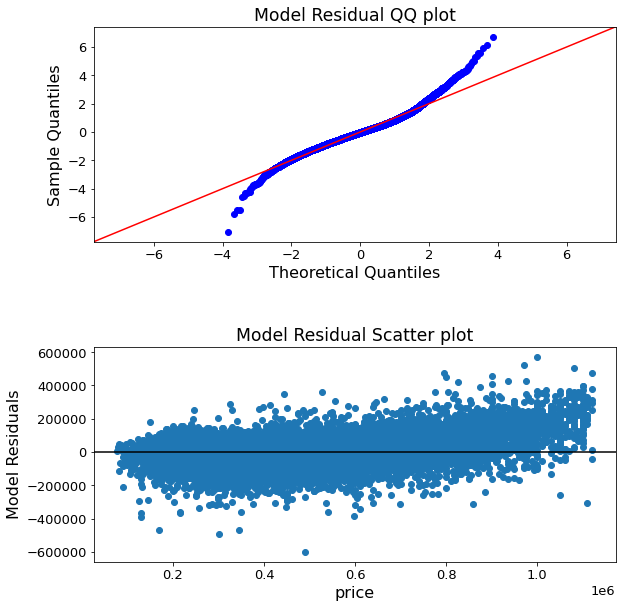

In [54]:
df2_ohe.model_and_plot('price')

<div class="shadow alert alert-success">
    <b>From the model:</b>
        <ul>
            <li>Similar model, but still have two high p-values zipcode_98022 and floors_2</li>
        </ul>
    </div>

## Interpretation
> - View and Interpret coefficients

In [55]:
zip_cols = [x for x in df2_ohe.columns if 'zipcode' in x]

In [56]:
df_test = df2_ohe.copy()
df_test.model.params = df2_ohe.model.params.drop(zip_cols)

In [57]:
df_test.plot_coef(cmap='Blues')

,Coefficients
waterfront,209550.088569
view_4_0,156971.187931
view_3_0,87466.004527
view_2_0,54174.203507
view_1_0,53998.777733
grade,47784.508279
condition,21086.134299
bathrooms,12744.567224
half_story,8561.075376
floors_2,4112.184648


<div class="shadow alert alert-success">
    <b>Obtainable Coefficients:</b>
        It would be difficult to move your house to have a waterfront view, but
        <ul>
            <li>Adding a <b>bathroom</b> could increase your resale value by ~ 12,700&#36;</li>
            <li>Dealing with the general <b>grade</b> and <b>condition</b> of the house </li>
            <li>Adding a <b>half_story 8,500&#36;</b> could increase the value more than simply adding a <b>2nd floor 4,100&#36;</b> or <b>3rd floor (-)32,700&#36;</b></li>
            <li>Each <b>sqft_living</b> added onto the house ~ increases the value by 103&#36;</li>
            <li>Adding a <b>bedroom</b> may reduce the value by ~ 4,600&#36;</li>
            <li>Adding a <b>basement</b> may reduce the value by ~ 18,600&#36;</li>
            </div>

### Map

#### Get and Map coordinates

In [58]:
coords = df[['lat', 'long']]
coordlist = coords.values.tolist()
len(coordlist)

21597

In [59]:
df_fresh.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [60]:
df_fresh.fill_na_mode(inplace=True)

Filling 11.0 % of waterfront with 0   0.000
Name: waterfront, dtype: float64
Filling 0.29 % of view with 0   0.000
Name: view, dtype: float64
Filling 17.79 % of yr_renovated with 0   0.000
Name: yr_renovated, dtype: float64


In [61]:
grade_index = list(df_fresh.grade.value_counts().index.sort_values())
grade_colors = ['#ff0000', '#fe4000', '#f96000', '#f17a00',
                '#e59100', '#d6a700','#c4bb00', '#adcd00',
                '#91df00', '#6aef00', '#01ff0d']
grade_color_index = dict(zip(grade_index, grade_colors))

In [62]:
remake_map = False
if remake_map:
    # A copy of the fresh dataframe
    df_new = df_fresh.copy()

    # Start location on map, find with https://www.latlong.net/
    location = (47.550579, -121.981752)

    # The actual folium map object
    
    map = folium.Map(location=location,
                     zoom_start=10,
                     tiles="CartoDB dark_matter",
                     prefer_canvas=True,
                     zoom_control=False
                    )

    # x is for testing smaller queries,  breaks loop at 100.
    # if I were to load all 23,000 it would take
    # 7 seconds between tests of circle variables
    x = 0
    for indx, row in df_new.iterrows():

        # Circle variables
        coord = row['lat': 'long']
        size = row['price']
        color = grade_color_index[row['grade']]
        opacity = .8

        # Circle represents the points on the map
        circle = folium.Circle(
            location=coord,
            radius=1,
            color=color,
            weight=(size/500000),
            opacity=opacity
        )
        circle.add_to(map)
        if x == 100:
            break  # breaks after 100 points 
        # x += 1

    # save to html for viewing outside of jupyter
    # simply locate map.html in the project folder and open with browser
    # if you plot all 23,000 it won't load in the notebook
    map.save('./map.html')
    # map

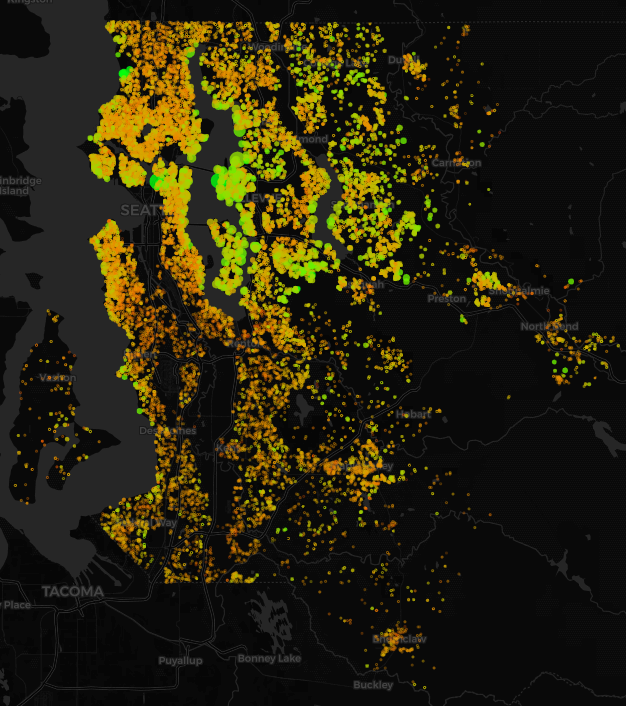

In [63]:
df = df_fresh.copy()

### Plotting grade

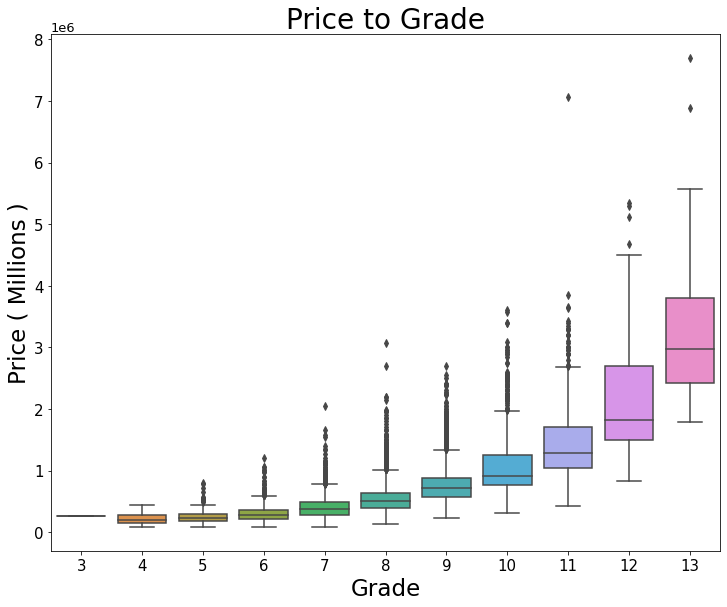

In [64]:
df_test = df.copy()
df_test['grade'] = df_test['grade'].astype('category')
fig, ax = plt.subplots(figsize=(12, 9.5))
sns.boxplot('grade', 'price', data=df_test, ax=ax)
ax.set_title("Price to Grade", fontdict={'size': 28})
ax.set_xlabel("Grade", fontdict={'size': 23})
ax.set_ylabel("Price ( Millions )", fontdict={'size': 23})

ax.tick_params(axis='both', which='major', labelsize=15)  # add dollar signs?

<div class="shadow alert alert-info">
  <strong>From the Plot:</strong> 
    <ul>
        <li>As grade increases, so does sale price.</li>
        <li>There is a strong linear relationship between <b>grade</b> and <b>price</b>.</li>
    </ul>
</div>

### Plotting zipcode

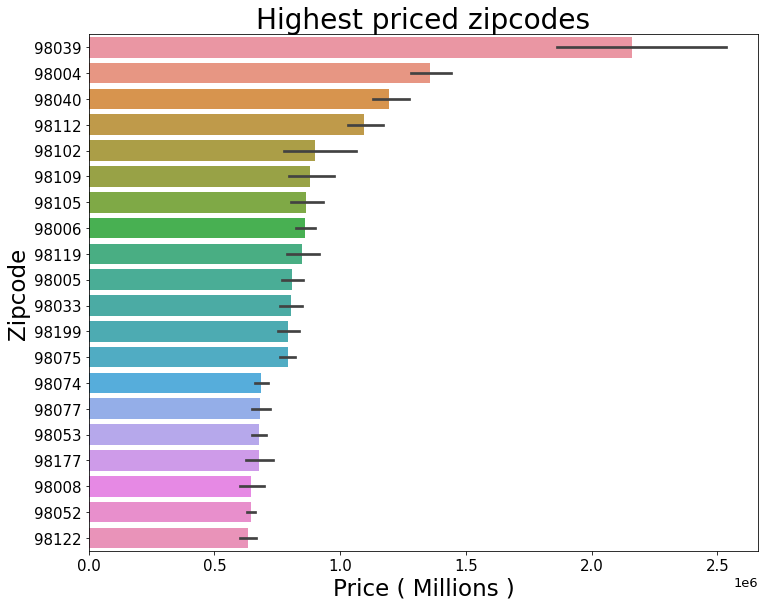

In [65]:
df_test = df2.copy()
zip_group = df_test.groupby('zipcode')['price'].mean(
              ).sort_values(ascending=False)[0:20]
df_test['zipcode'] = df_test['zipcode'].astype('category')
fig, ax = plt.subplots(figsize=(12, 9.5))
sns.barplot(x='price', y='zipcode', data=df_test, ax=ax, order=zip_group.keys())


# simplify !!!!!
ax.set_title("Highest priced zipcodes")
ax.title.set_fontsize(28)
ax.xaxis.label.set_fontsize(23)
ax.yaxis.label.set_fontsize(23)
ax.xaxis.label.set_text("Price ( Millions )")
ax.yaxis.label.set_text("Zipcode")
ax.tick_params(axis='both', which='major', labelsize=15)

<div class="shadow alert alert-info">
  <strong>From the Plot:</strong> 
    <ul>
        <li>98039 has a mean in the millions</li>
        <li>98122 has a mean just over 500,000\$</li>
        <li>This is the top 20 zipcodes from the dataset</li>
    </ul>
</div>

### Plotting Bathrooms

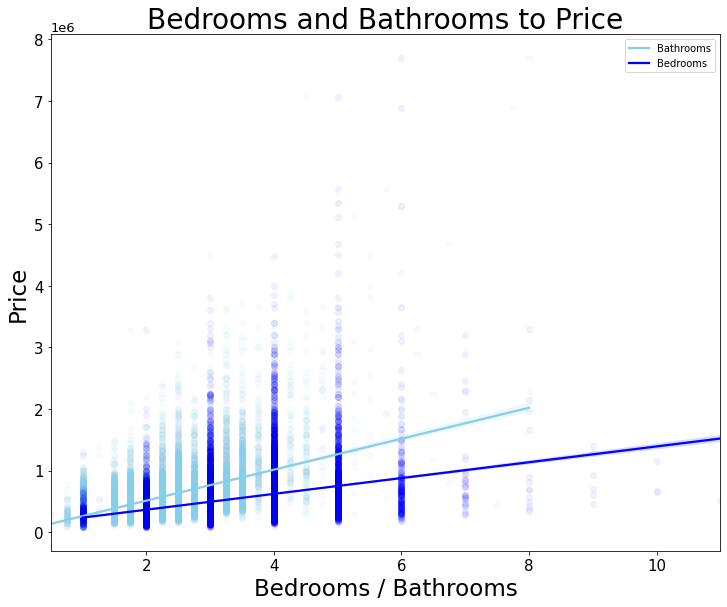

In [66]:
df_test = df.copy()
df_test = df_test[df_test.bedrooms != 33]

fig, ax = plt.subplots(figsize=(12, 9.5))
sns.regplot('bathrooms', 'price', data=df_test,
            ax=ax, marker='o',
            line_kws={'alpha':1, 'color':'skyblue'},
            scatter_kws={'alpha': .05, 'color': 'skyblue'})

sns.regplot('bedrooms', 'price', data=df_test,
            ax=ax, marker='o',
            line_kws={'color': 'blue'},
            scatter_kws={'alpha': .05, 'color': 'blue'})

ax.set_title("Bedrooms and Bathrooms to Price")
ax.title.set_fontsize(28)
ax.xaxis.label.set_fontsize(23)
ax.yaxis.label.set_fontsize(23)
ax.xaxis.label.set_text("Bedrooms / Bathrooms")
ax.yaxis.label.set_text("Price")
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(('Bathrooms','Bedrooms'),numpoints=1,loc=1)

<div class="shadow alert alert-info">
  <strong>From the Plot:</strong> 
    <ul>
        <li><b>Bedrooms</b> and <b>Bathrooms</b> are correlated well with <b>price</b></li>
        <li>There are some outliers, mostly from <b>Bedrooms</b></li>
    </ul>
</div>

### Plotting Square Foot of Living

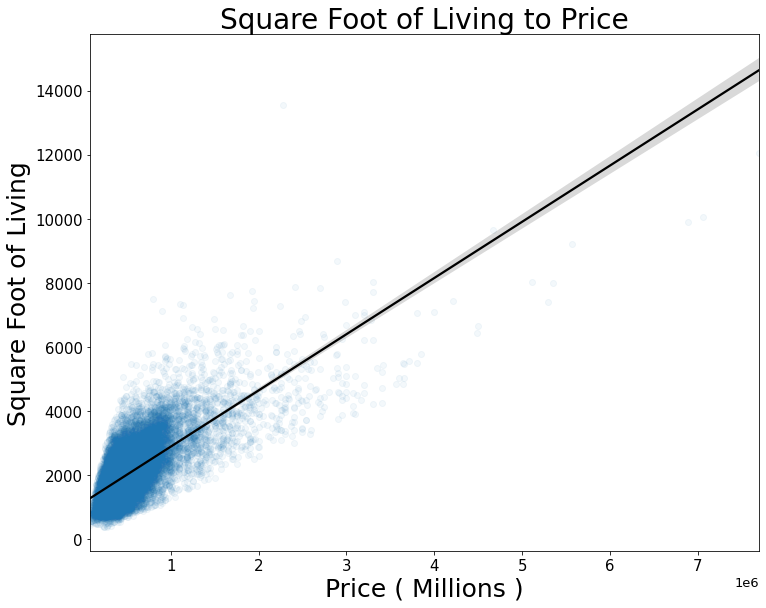

In [67]:
df_test = df.copy()
fig, ax = plt.subplots(figsize=(12, 9.5))
sns.regplot('price', 'sqft_living', data=df_test, ax=ax,
           scatter_kws={'alpha': .05},
           line_kws={'color': 'k'})

ax.set_title("Square Foot of Living to Price")
ax.title.set_fontsize(28)
ax.xaxis.label.set_fontsize(25)
ax.yaxis.label.set_fontsize(25)
ax.xaxis.label.set_text("Price ( Millions )")
ax.yaxis.label.set_text("Square Foot of Living")
ax.tick_params(axis='both', which='major', labelsize=15)

<div class="shadow alert alert-info">
  <strong>From the Plot:</strong> 
    <ul>
        <li><b>Square Footage living area</b> has a strong linear relationship with price.</li>
        <li>There are some outliers that could be skewing the model.</li>
    </ul>
</div>

### Plotting Price Map

Found 1158 outliers using IQR in price or ~ 5.36%
Removed


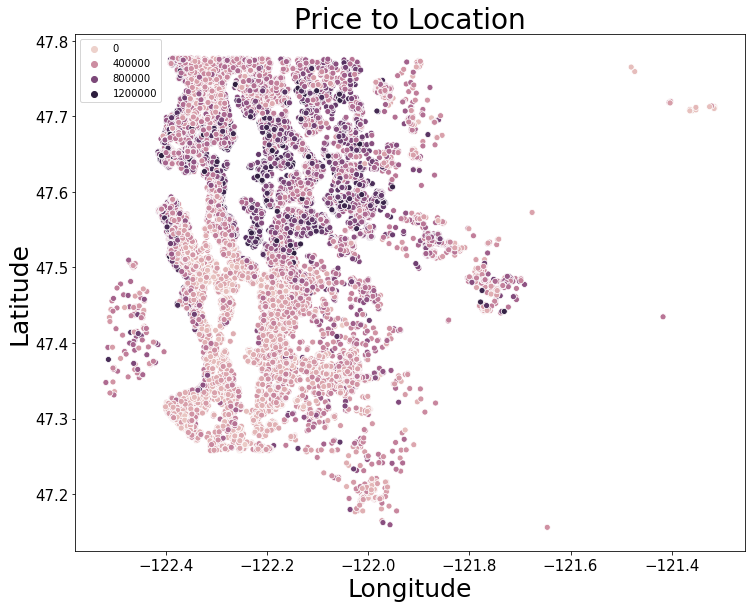

In [68]:
df_test = df.copy()
fig, ax = plt.subplots(figsize=(12, 9.5))
df_test = df_test.outlier_removal('price', IQR=True)

coords = df_test[['long', 'lat']]
x = coords['long'].values
y = coords['lat'].values
h = df_test['price'].values
sns.scatterplot(x, y, ax=ax, hue=h)
ax.set_title("Price to Location")
ax.title.set_fontsize(28)
ax.xaxis.label.set_fontsize(25)
ax.yaxis.label.set_fontsize(25)
ax.xaxis.label.set_text("Longitude")
ax.yaxis.label.set_text("Latitude")
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

<div class="shadow alert alert-info">
  <strong>From the Plot:</strong> 
    <ul>
        <li>The northern half has higher prices, especially in the "bay" area.</li>
        <li>Some of these could be the higher zip codes we saw above.</li>
    </ul>
</div>

<div class="shadow alert alert-success">
    <b>Conclusion:</b>
  <ul>
    <li>Adding square feet, a bedroom, or bathroom could increase your home value.</li>
    <li>Depending on water, sewage piping and location, you should add a bathroom for the greater value increase.</li>
    <li>Square feet added in any form should increase the value.</li>
    <li>Focus on the overall grade of your home, and of your neighbors to increase the value.</li></ul>
</div>